# Processamento no domínio da frequência de dados potenciais

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import prism_mag

In [3]:
import transformation

## Gerando os parâmetros das coordenadas

In [4]:
Nx = 100
Ny = 50
ymin = -2000.
ymax = 2000.
xmin = -2000.
xmax = 2000.
area = [xmin,xmax,ymin,ymax]
shape = (Nx,Ny)

In [5]:
dx = (xmax - xmin)/(Nx-1)
dy = (ymax - ymin)/(Ny-1)

In [6]:
x = np.linspace(area[0],area[1],num=Nx)
y = np.linspace(area[2],area[3],num=Ny) 
yc,xc = np.meshgrid(y,x)

In [7]:
voo = -100.
zc = voo*np.ones_like(xc)

In [8]:
coordinates = np.array([yc.ravel(),xc.ravel(),zc.ravel()])

## Gerando os parâmetros do prisma

In [9]:
intensidades = np.array([50.])

In [10]:
I,D = -30.,50.
direcoes = np.array([[I,D]])

In [11]:
modelo = np.array([[-50.,50.,-800.,800.,100.,450.]])

## Cálculo das componentes do campo magnético

In [12]:
bz = prism_mag.magnetics(coordinates,modelo,intensidades,direcoes,field="b_z").reshape(shape)

In [13]:
bx = prism_mag.magnetics(coordinates,modelo,intensidades,direcoes,field="b_x").reshape(shape)

In [14]:
by = prism_mag.magnetics(coordinates,modelo,intensidades,direcoes,field="b_y").reshape(shape)

### Anomalia de campo total aproximada

In [15]:
I0,D0 = -40.,30.
j0x = np.cos(np.deg2rad(I0))*np.cos(np.deg2rad(D0))
j0y = np.cos(np.deg2rad(I0))*np.sin(np.deg2rad(D0))
j0z = np.sin(np.deg2rad(I0))
tfa = j0x*bx + j0y*by + j0z*bz

In [16]:
tfa_obs = tfa

## Visualização dos dados calculados 

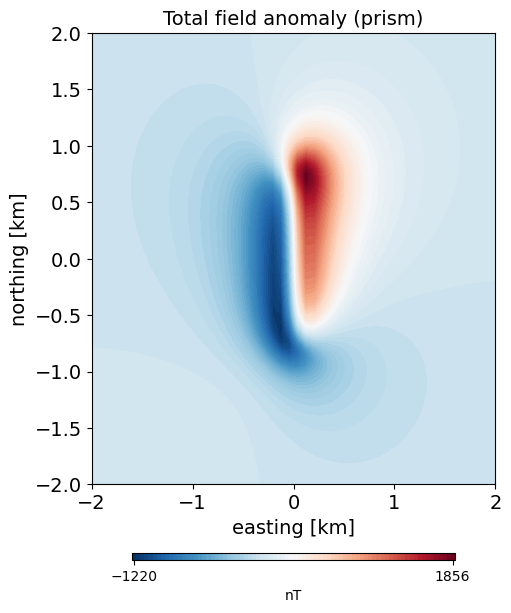

In [17]:
title_font = 14
bottom_font = 14
plt.close('all')
plt.figure(figsize=(5,6), layout='constrained')

plt.title('Total field anomaly (prism)', fontsize=title_font)
plt.xlabel('easting [km]', fontsize = title_font)
plt.ylabel('northing [km]', fontsize = title_font)
plt.contourf(1e-3*yc,1e-3*xc,tfa_obs,100,cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.03, aspect=50, shrink=.8,orientation='horizontal',label='nT',ticks=[tfa_obs.min(), tfa_obs.max()])
cb.ax.tick_params(labelsize=10)

file_name = 'images/TFA_prism'
plt.savefig(file_name+'.png',dpi=200)
plt.show()

## Continuação para cima

In [18]:
height = 500.

In [19]:
tfa_up = transformation.upward_continuation([yc,xc,zc],tfa_obs,height)

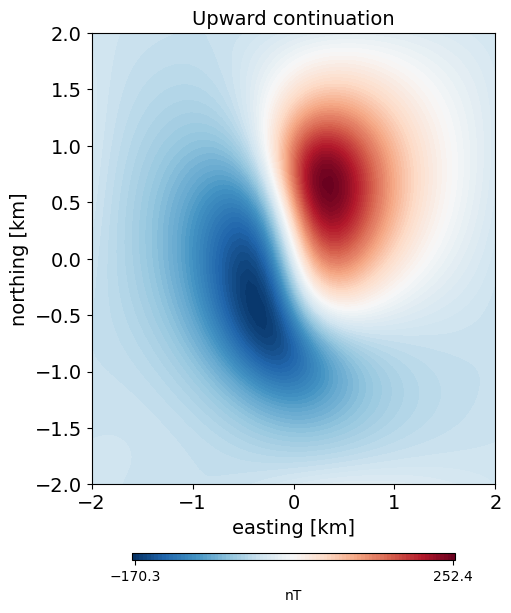

In [20]:
itle_font = 14
bottom_font = 14
plt.close('all')
plt.figure(figsize=(5,6), layout='constrained')

plt.title('Upward continuation', fontsize=title_font)
plt.xlabel('easting [km]', fontsize = title_font)
plt.ylabel('northing [km]', fontsize = title_font)
plt.contourf(1e-3*yc,1e-3*xc,tfa_up,100,cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.03, aspect=50, shrink=.8,orientation='horizontal',label='nT',ticks=[tfa_up.min(), tfa_up.max()])
cb.ax.tick_params(labelsize=10)

file_name = 'images/upward_TFA'
plt.savefig(file_name+'.png',dpi=300)

plt.show()

## Redução ao polo

In [21]:
I0,D0 = -40.,30.
Ir,Dr = -30.,50.
tfa_pole = transformation.reduction_to_pole([yc,xc,zc],tfa_obs,(Ir,Dr),(I0,D0))

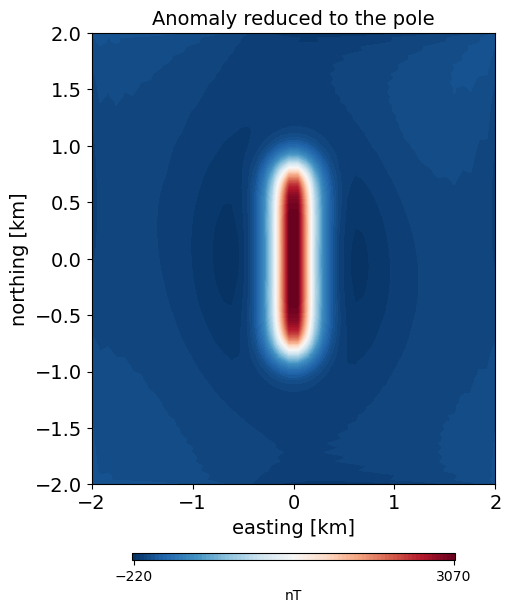

In [29]:
title_font = 14
bottom_font = 14
plt.close('all')
plt.figure(figsize=(5,6), layout='constrained')

plt.title('Anomaly reduced to the pole', fontsize=title_font)
plt.xlabel('easting [km]', fontsize = title_font)
plt.ylabel('northing [km]', fontsize = title_font)
plt.contourf(1e-3*yc,1e-3*xc,tfa_pole,100,cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.03, aspect=50, shrink=.8,orientation='horizontal',label='nT',ticks=[tfa_pole.min(), tfa_pole.max()])
cb.ax.tick_params(labelsize=10)

file_name = 'images/reduced_TFA'
plt.savefig(file_name+'.png',dpi=300)

plt.show()

## Cálculo de derivadas primeiras

In [23]:
dx_tfa = transformation.derivative_x([yc,xc,zc],tfa_pole,order=1)
dy_tfa = transformation.derivative_y([yc,xc,zc],tfa_pole,order=1)
dz_tfa = transformation.derivative_z([yc,xc,zc],tfa_pole,order=1)

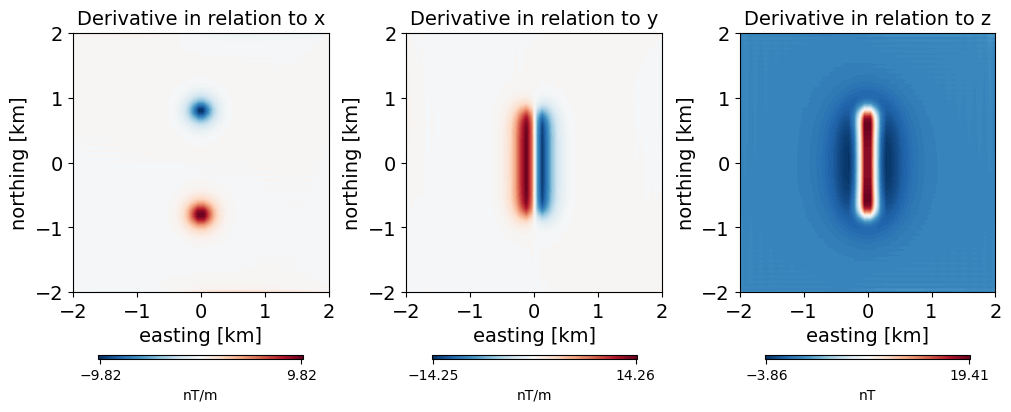

In [24]:
title_font = 14
bottom_font = 14
plt.close('all')
plt.figure(figsize=(10,4), layout='constrained')

plt.subplot(131)
plt.title('Derivative in relation to x', fontsize=title_font)
plt.xlabel('easting [km]', fontsize = title_font)
plt.ylabel('northing [km]', fontsize = title_font)
plt.contourf(1e-3*yc,1e-3*xc,dx_tfa,100,cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.03, aspect=50, shrink=.8,orientation='horizontal',label='nT/m',ticks=[dx_tfa.min(), dx_tfa.max()])
cb.ax.tick_params(labelsize=10)

plt.subplot(132)
plt.title('Derivative in relation to y', fontsize=title_font)
plt.xlabel('easting [km]', fontsize = title_font)
plt.ylabel('northing [km]', fontsize = title_font)
plt.contourf(1e-3*yc,1e-3*xc,dy_tfa,100,cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.03, aspect=50, shrink=.8,orientation='horizontal',label='nT/m',ticks=[dy_tfa.min(), dy_tfa.max()])
cb.ax.tick_params(labelsize=10)

plt.subplot(133)
plt.title('Derivative in relation to z', fontsize=title_font)
plt.xlabel('easting [km]', fontsize = title_font)
plt.ylabel('northing [km]', fontsize = title_font)
plt.contourf(1e-3*yc,1e-3*xc,dz_tfa,100,cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.03, aspect=50, shrink=.8,orientation='horizontal',label='nT',ticks=[dz_tfa.min(), dz_tfa.max()])
cb.ax.tick_params(labelsize=10)

file_name = 'images/derivatives_tfa'
plt.savefig(file_name+'.png',dpi=300)

plt.show()

## Amplitude do gradiente total

In [25]:
tga = np.sqrt(dx_tfa*dx_tfa + dy_tfa*dy_tfa + dz_tfa*dz_tfa)

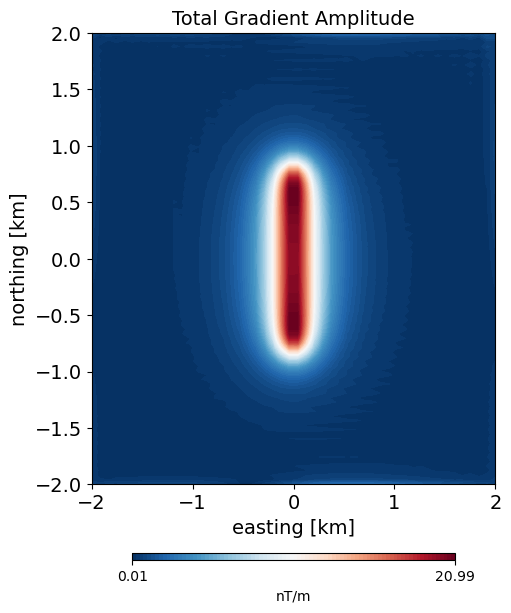

In [30]:
title_font = 14
bottom_font = 14
plt.close('all')
plt.figure(figsize=(5,6), layout='constrained')

plt.title('Total Gradient Amplitude', fontsize=title_font)
plt.xlabel('easting [km]', fontsize = title_font)
plt.ylabel('northing [km]', fontsize = title_font)
plt.contourf(1e-3*yc,1e-3*xc,tga,100,cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.03, aspect=50, shrink=.8,orientation='horizontal',label='nT/m',ticks=[tga.min(), tga.max()])
cb.ax.tick_params(labelsize=10)

file_name = 'images/TGA_TFA'
plt.savefig(file_name+'.png',dpi=300)

plt.show()